In [2]:
import math
import pandas as pd
import numpy as np

In [18]:
def findMinGradFunction(a: float, b: float, c: float, d: float, eps: float = 0.00001):
    x = [0]
    y = [0]
    dx = [a + 2 * c * math.exp(c * x[-1] ** 2 + d * y[-1] ** 2)]
    dy = [b + 2 * d * math.exp(c * x[-1] ** 2 + d * y[-1] ** 2)]
    alpha = [1]

    def popArrays():
        x.pop()
        y.pop()
        dx.pop()
        dy.pop()

    def f(x, y):
        z = a * x + b * y + math.exp(c * x ** 2 + d * y ** 2)
        return z

    while True:
        x.append(x[-1] - alpha[-1] * dx[-1])
        y.append(y[-1] - alpha[-1] * dy[-1])

        dx.append(a + 2 * c * x[-1] * math.exp(c * x[-1] ** 2 + d * y[-1] ** 2))
        dy.append(b + 2 * d * y[-1] * math.exp(c * x[-1] ** 2 + d * y[-1] ** 2))

        if abs(dx[-1]) < eps / 2 and abs(dy[-1]) < eps / 2:
            return np.array([x, y, dx, dy])

        if f(x[-1], y[-1]) > f(x[-2], y[-2]):
            alpha.append(alpha[-1] / 2)
            popArrays()
        elif f(x[-1], y[-1]) < f(x[-2], y[-2]):
            alpha.pop()

In [19]:
result = findMinGradFunction(a=11, b=-0.4, c=1, d=0.21).transpose()

In [20]:
df = pd.DataFrame(result, columns=['x','y', 'dx', 'dy'])
df

,x,y,dx,dy
0,0.000000,0.000000,13.000000,0.020000
1,-1.625000,-0.002500,-34.571445,-0.414723
2,-0.544642,0.010460,9.534525,-0.394090
3,-1.140550,0.035091,2.620643,-0.345861
4,-1.222445,0.045899,0.099429,-0.314051
5,-1.228660,0.065527,-0.129253,-0.275355
6,-1.212503,0.099946,0.429204,-0.217017
7,-1.239328,0.113510,-0.546205,-0.177922
8,-1.222259,0.119070,0.078391,-0.176568
9,-1.227159,0.130106,-0.104184,-0.152770


In [21]:
%pylab inline



Populating the interactive namespace from numpy and matplotlib


In [22]:
import matplotlib.pyplot as plt

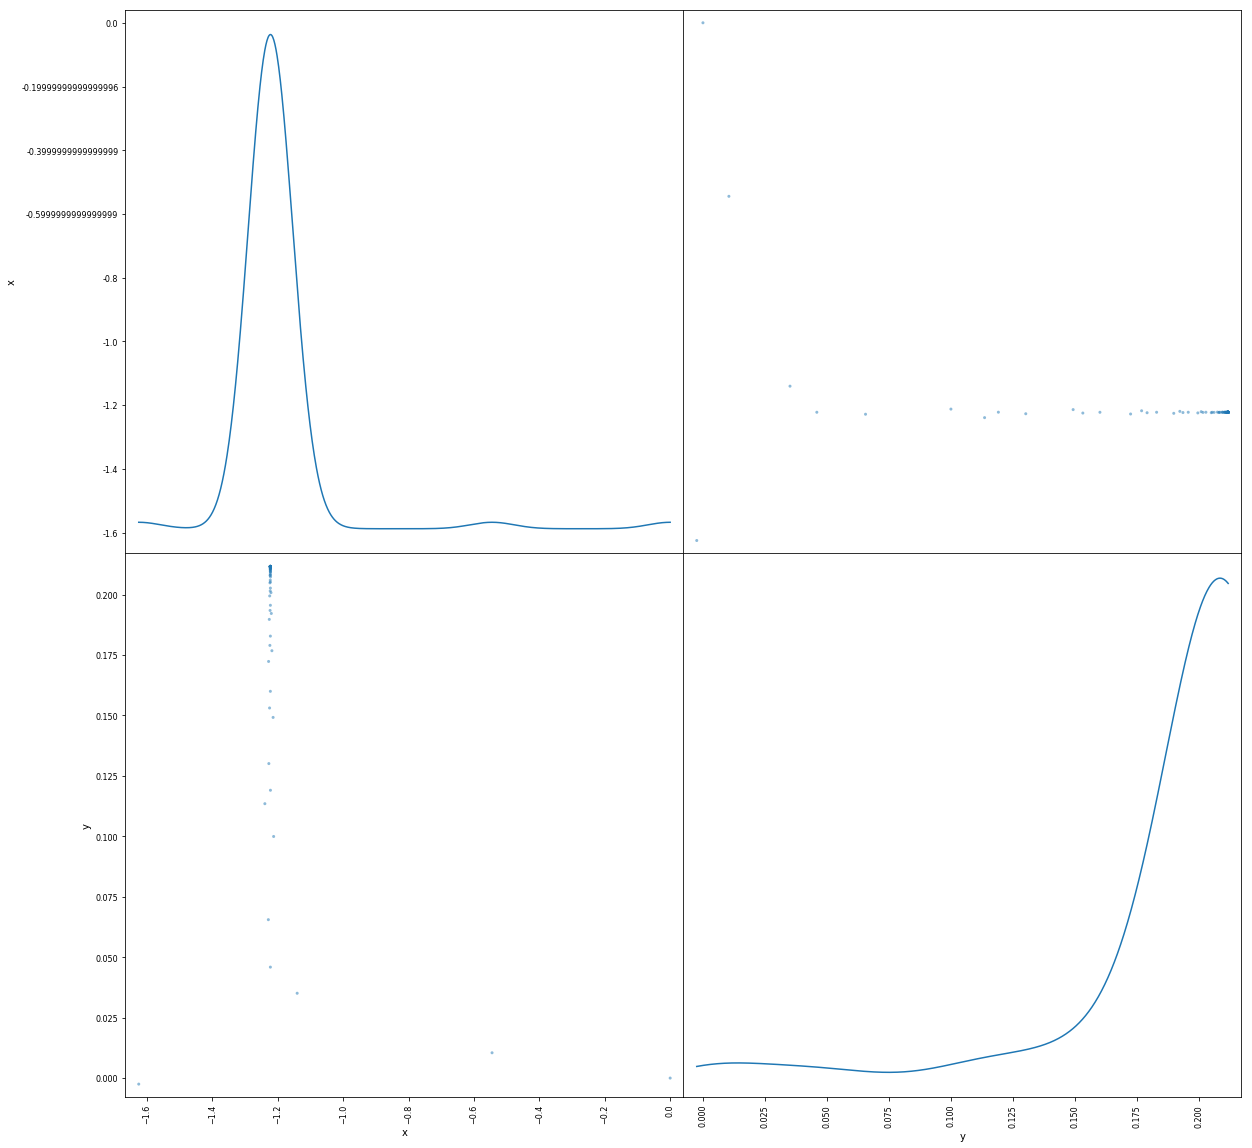

In [28]:
pd.plotting.scatter_matrix(df[['x', 'y']], figsize=(20, 20), diagonal='kde')
plt.show()

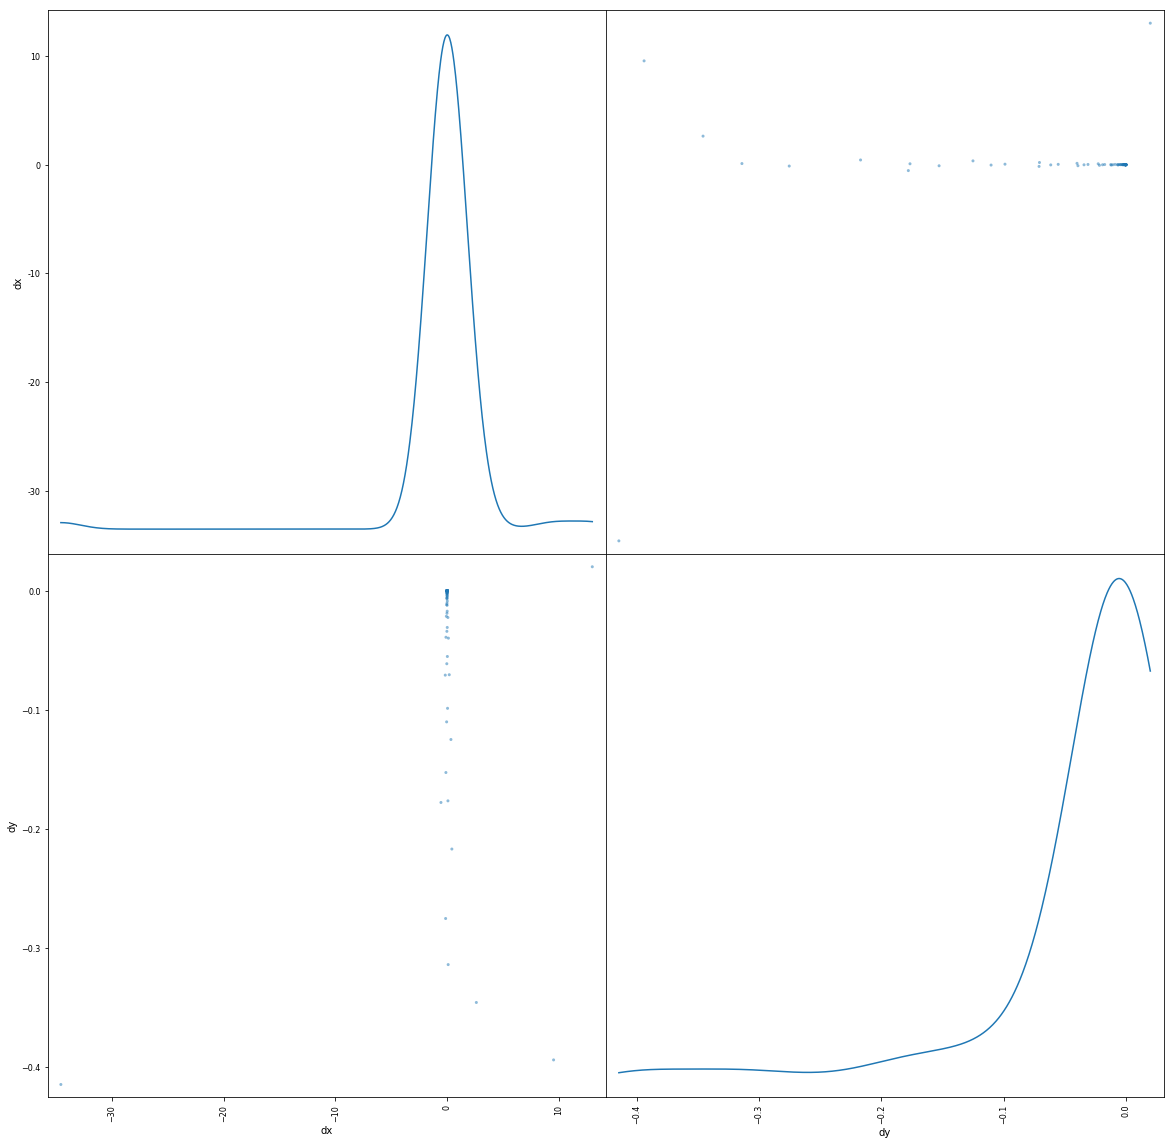

In [29]:
pd.plotting.scatter_matrix(df[['dx', 'dy']], figsize=(20, 20), diagonal='kde')
plt.show()